In [1]:
import pandas as pd

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_capitals_in_the_United_States'

In [3]:
tables = pd.read_html(url)
tables

[                             City                                Building  \
       Second Continental Congress             Second Continental Congress   
 0      Philadelphia, Pennsylvania                       Independence Hall   
 1             Baltimore, Maryland                        Henry Fite House   
 2      Philadelphia, Pennsylvania                       Independence Hall   
 3         Lancaster, Pennsylvania                             Court House   
 4              York, Pennsylvania  Court House (now Colonial Court House)   
 5      Philadelphia, Pennsylvania           College Hall[citation needed]   
 6   Congress of the Confederation           Congress of the Confederation   
 7      Philadelphia, Pennsylvania                       Independence Hall   
 8        Princeton, New Jersey[a]                             Nassau Hall   
 9             Annapolis, Maryland                    Maryland State House   
 10            Trenton, New Jersey                      French A

In [4]:
type(tables)

list

In [5]:
df = tables[1]
df.columns = [
              'State', 'Capital',  'Year', 'Area', 'Municipal Population', 
              'Metropolitan Population', 'Population Rank', 'Notes']
df.head()

,State,Capital,Year,Area,Municipal Population,Metropolitan Population,Population Rank,Notes
0,Alabama,Montgomery,1846,159.8,198525,373290,461516,3
1,Alaska,Juneau,1906,2716.7,32113,32113,NaN,3
2,Arizona,Phoenix,1912,517.6,1680992,4948203,5002221,1
3,Arkansas,Little Rock,1821,116.2,197312,742384,908941,1
4,California,Sacramento,1854,97.9,513624,2363730,2639124,6


In [6]:
del df['Population Rank']
del df['Notes']


In [7]:
df = df.iloc[:-1 , :]

In [8]:
df.head()

,State,Capital,Year,Area,Municipal Population,Metropolitan Population
0,Alabama,Montgomery,1846,159.8,198525,373290
1,Alaska,Juneau,1906,2716.7,32113,32113
2,Arizona,Phoenix,1912,517.6,1680992,4948203
3,Arkansas,Little Rock,1821,116.2,197312,742384
4,California,Sacramento,1854,97.9,513624,2363730


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State                    50 non-null     object
 1   Capital                  50 non-null     object
 2   Year                     50 non-null     object
 3   Area                     50 non-null     object
 4   Municipal Population     50 non-null     object
 5   Metropolitan Population  50 non-null     object
dtypes: object(6)
memory usage: 2.5+ KB


In [23]:
df['Area'] = pd.to_numeric(df['Area'])
df['Municipal Population'] = pd.to_numeric(df['Municipal Population'])
df['Metropolitan Population'] = pd.to_numeric(df['Metropolitan Population'])
df['Year'] = pd.to_numeric(df['Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    50 non-null     object 
 1   Capital                  50 non-null     object 
 2   Year                     50 non-null     int64  
 3   Area                     50 non-null     float64
 4   Municipal Population     50 non-null     int64  
 5   Metropolitan Population  50 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.5+ KB


C:\Users\chase\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chase\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chase\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [43]:
largest_area = df.sort_values(by='Area', ascending=False).head(10)
largest_area.head()

,State,Capital,Year,Area,Municipal Population,Metropolitan Population
1,Alaska,Juneau,1906,2716.7,32113,32113
35,Oklahoma,Oklahoma City,1910,620.3,655057,1408950
41,Tennessee,Nashville,1826,525.9,670820,1934317
2,Arizona,Phoenix,1912,517.6,1680992,4948203
13,Indiana,Indianapolis,1825,361.5,876384,2074537


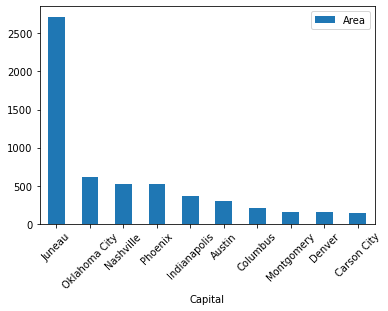

In [44]:
largest_area_chart = largest_area.plot.bar(x='Capital', y='Area', rot=45)

In [39]:
largest_municipal = df.sort_values(by='Municipal Population', ascending=False).head(10)
largest_municipal.head()

,State,Capital,Year,Area,Municipal Population,Metropolitan Population
2,Arizona,Phoenix,1912,517.6,1680992,4948203
42,Texas,Austin,1839,305.1,978908,2227083
34,Ohio,Columbus,1816,210.3,898553,2122271
13,Indiana,Indianapolis,1825,361.5,876384,2074537
5,Colorado,Denver,1867,153.3,727211,2967239


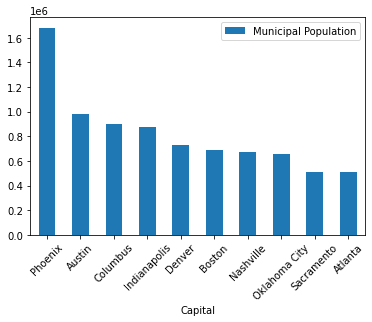

In [40]:
largest_municipal_chart = largest_municipal.plot.bar(x='Capital', y='Municipal Population', rot=45)

In [38]:
largest_metro = df.sort_values(by='Metropolitan Population', ascending=False).head(10)
largest_metro.head()

,State,Capital,Year,Area,Municipal Population,Metropolitan Population
9,Georgia,Atlanta,1868,133.5,506811,6020364
2,Arizona,Phoenix,1912,517.6,1680992,4948203
20,Massachusetts,Boston,1630,89.6,692600,4873019
22,Minnesota,Saint Paul,1849,52.8,308096,3654908
5,Colorado,Denver,1867,153.3,727211,2967239


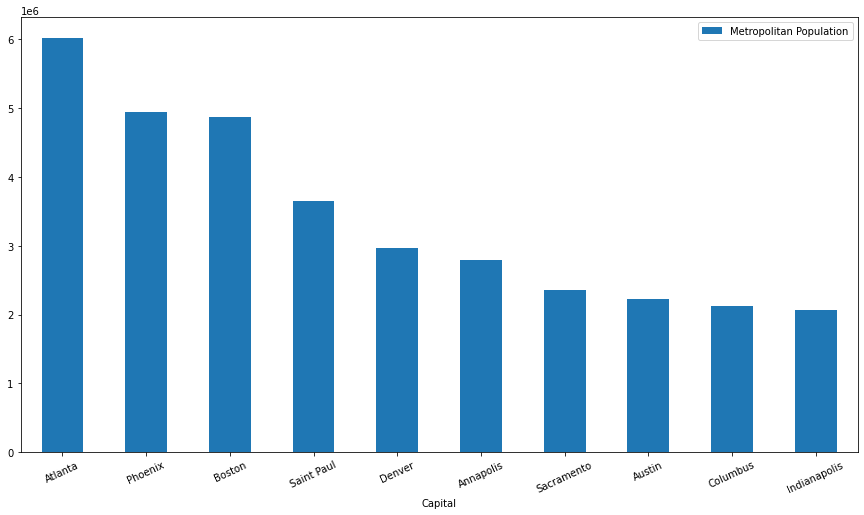

In [55]:
largest_metro_chart = largest_metro.plot.bar(x='Capital', y='Metropolitan Population', rot=25, figsize=(15, 8))
largest_metro_chart.figure.savefig('metro.png')

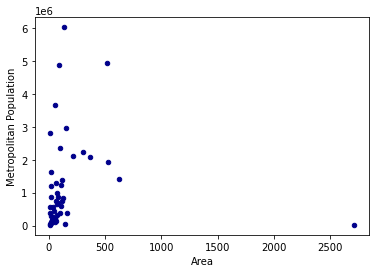

In [57]:
ax1 = df.plot.scatter(x='Area',
                      y='Metropolitan Population',
                      c='DarkBlue')

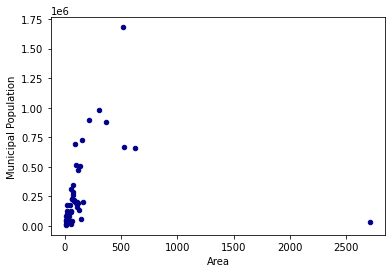

In [58]:
ax1 = df.plot.scatter(x='Area',
                      y='Municipal Population',
                      c='DarkBlue')

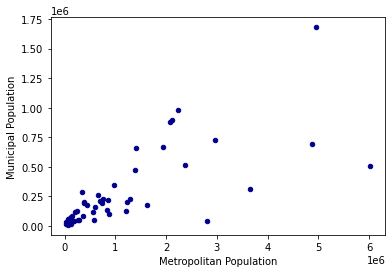

In [59]:
ax1 = df.plot.scatter(x='Metropolitan Population',
                      y='Municipal Population',
                      c='DarkBlue')

In [9]:
df.set_index('Capital', inplace=True)
df.head()

,State,Year,Area,Municipal Population,Metropolitan Population
Capital,,,,,
Montgomery,Alabama,1846,159.8,198525,373290
Juneau,Alaska,1906,2716.7,32113,32113
Phoenix,Arizona,1912,517.6,1680992,4948203
Little Rock,Arkansas,1821,116.2,197312,742384
Sacramento,California,1854,97.9,513624,2363730


In [10]:
df.loc['Phoenix']

State                      Arizona
Year                          1912
Area                         517.6
Municipal Population       1680992
Metropolitan Population    4948203
Name: Phoenix, dtype: object

In [11]:
html_table = df.to_html()
html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>State</th>\n      <th>Year</th>\n      <th>Area</th>\n      <th>Municipal Population</th>\n      <th>Metropolitan Population</th>\n    </tr>\n    <tr>\n      <th>Capital</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Montgomery</th>\n      <td>Alabama</td>\n      <td>1846</td>\n      <td>159.8</td>\n      <td>198525</td>\n      <td>373290</td>\n    </tr>\n    <tr>\n      <th>Juneau</th>\n      <td>Alaska</td>\n      <td>1906</td>\n      <td>2716.7</td>\n      <td>32113</td>\n      <td>32113</td>\n    </tr>\n    <tr>\n      <th>Phoenix</th>\n      <td>Arizona</td>\n      <td>1912</td>\n      <td>517.6</td>\n      <td>1680992</td>\n      <td>4948203</td>\n    </tr>\n    <tr>\n      <th>Little Rock</th>\n      <td>Arkansas</td>\n      <td>1821</td>\n      <td>116.2</td>\n      <td

In [12]:
html_table.replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>State</th>      <th>Year</th>      <th>Area</th>      <th>Municipal Population</th>      <th>Metropolitan Population</th>    </tr>    <tr>      <th>Capital</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Montgomery</th>      <td>Alabama</td>      <td>1846</td>      <td>159.8</td>      <td>198525</td>      <td>373290</td>    </tr>    <tr>      <th>Juneau</th>      <td>Alaska</td>      <td>1906</td>      <td>2716.7</td>      <td>32113</td>      <td>32113</td>    </tr>    <tr>      <th>Phoenix</th>      <td>Arizona</td>      <td>1912</td>      <td>517.6</td>      <td>1680992</td>      <td>4948203</td>    </tr>    <tr>      <th>Little Rock</th>      <td>Arkansas</td>      <td>1821</td>      <td>116.2</td>      <td>197312</td>      <td>742384</td>    </tr>    <tr>      <th>Sacramento</th>      <td>California</t

In [13]:
df.to_html('table.html')

In [16]:
df.to_json('capitals.json');